# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import requests
import time
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
my_service = Service(executable_path=ChromeDriverManager().install())
browser = Browser('chrome', service=my_service)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object

#HTML from Browser
html = browser.html

# Create a Beautiful Soup Object from the HTML
soup = BeautifulSoup(html, 'html.parser')


In [5]:
# Extract all rows of data
table = soup.find("table", {"class":"table"})

dfs = pd.read_html(str(table))
df = dfs[0]

df.head()

C:\Users\IvyM5\AppData\Local\Temp\ipykernel_9716\965726729.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  dfs = pd.read_html(str(table))


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
scraped_data = []

# Loop through the scraped data to create a list of rows
for row in scraped_data:
    data_rows.append(row)


In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
columns = ["id", "terrestrial_date", "sol", "ls", "month", "min_temp", "pressure"]
mars_weather_df = pd.DataFrame(scraped_data, columns=columns)

In [8]:
# Confirm DataFrame was created successfully
print(mars_weather_df)

Empty DataFrame
Columns: [id, terrestrial_date, sol, ls, month, min_temp, pressure]
Index: []


In [9]:
table_rows = table.find_all("tr", {"class": "data-row"})
for table_row in table_rows[0:10]:
    id = table_row.find_all("td")[0].text
    terrestrial_date = table_row.find_all("td")[1].text
    print(terrestrial_date)

2012-08-16
2012-08-17
2012-08-18
2012-08-19
2012-08-20
2012-08-21
2012-08-22
2012-08-23
2012-08-27
2012-08-28


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [10]:
# Examine data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1867 non-null   int64  
 1   terrestrial_date  1867 non-null   object 
 2   sol               1867 non-null   int64  
 3   ls                1867 non-null   int64  
 4   month             1867 non-null   int64  
 5   min_temp          1867 non-null   float64
 6   pressure          1867 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 102.2+ KB


In [11]:
# Change data types for data analysis
df["terrestrial_date"] = pd.to_datetime(df["terrestrial_date"])

In [12]:
# Confirm type changes were successful by examining data types again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


In [13]:
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [14]:
# 1. How many months are there on Mars?
df.month.nunique()

12

In [15]:
# 2. How many sols (Martian days) worth of data are there?
df.sol.count()

1867

In [16]:
# 3. What is the average minimum temperature by month?
df.groupby("month").min_temp.mean()

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

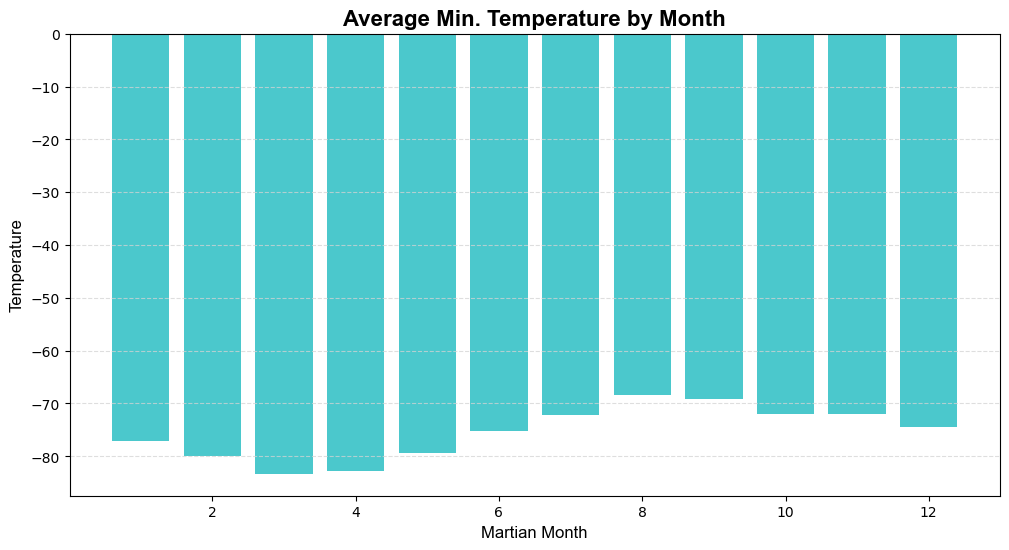

In [17]:
# Plot the average minimum temperature by month
data = df.groupby("month").min_temp.mean()

#Canvas Size
plt.figure(figsize=(12, 6))

#Create basic plot
plt.bar(data.index, data.values, color="#4bc8cc", align="center")

# Customizations
plt.xlabel("Martian Month", fontfamily="Arial", fontsize=12)
plt.ylabel("Temperature", fontfamily="Arial", fontsize=12)
plt.title("Average Min. Temperature by Month", fontweight="bold", fontsize=16, fontfamily="Arial")
plt.grid(axis="y", linestyle="--", color="lightgrey", alpha=0.75)

#Save Graph
plt.show()


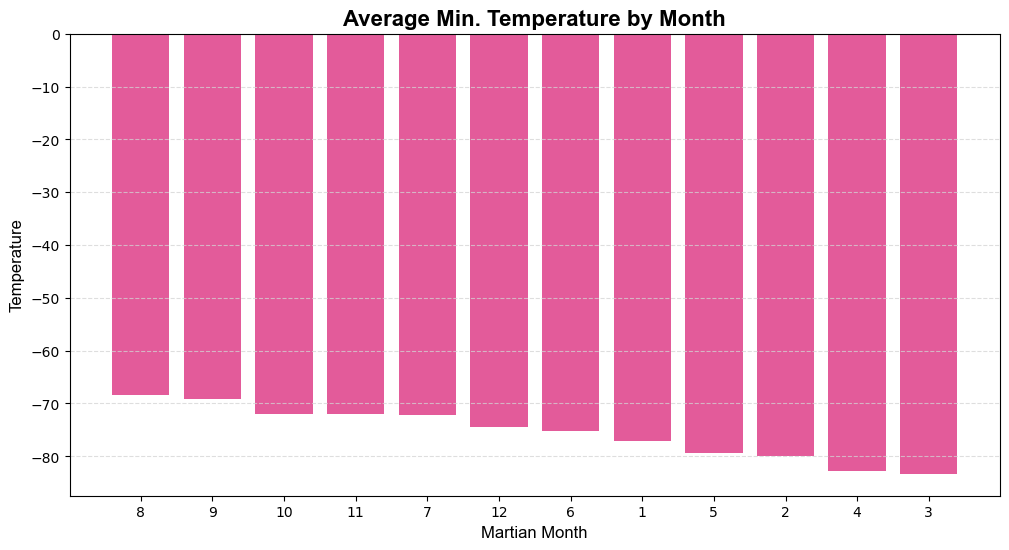

In [18]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
# Plot the average minimum temperature by month
data = df.groupby("month").min_temp.mean().sort_values(ascending=False)

# Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.bar(data.index.astype(str), data.values, color="#e35b9a", align="center") # make the month a string

# Customizations
plt.xlabel("Martian Month", fontfamily="Arial", fontsize=12)
plt.ylabel("Temperature", fontfamily="Arial", fontsize=12)
plt.title("Average Min. Temperature by Month", fontweight="bold", fontsize=16, fontfamily="Arial")

# Add in a background grid
plt.grid(axis="y", linestyle="--", color="lightgrey", alpha=0.75)

# Save the Graph
plt.show()


In [19]:
# 4. What is the average pressure by month?
df.groupby("pressure").min_temp.mean()

pressure
727.0   -77.0
728.0   -77.0
729.0   -76.5
730.0   -78.0
731.0   -77.5
         ... 
921.0   -67.0
922.0   -65.5
923.0   -67.2
924.0   -68.0
925.0   -69.0
Name: min_temp, Length: 199, dtype: float64

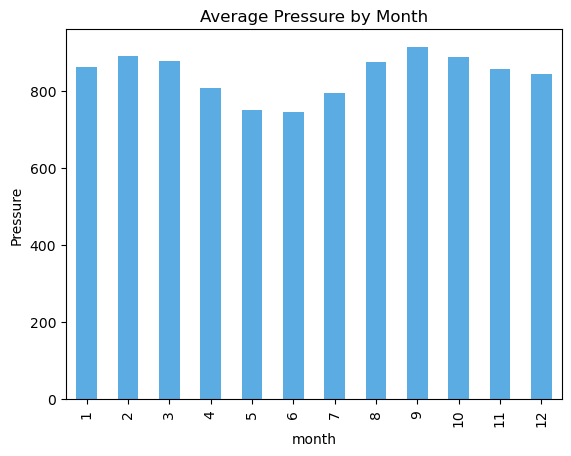

In [20]:
# Plot the average pressure by month
df.groupby("month").pressure.mean().plot(kind="bar", title="Average Pressure by Month", ylabel="Pressure", color="#5bace3")
plt.show()

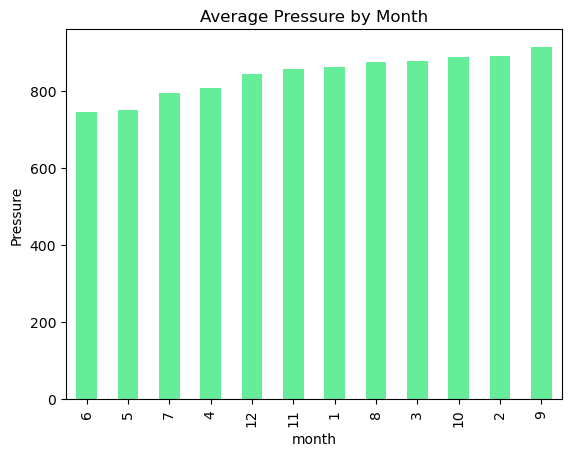

In [21]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
df.groupby("month").pressure.mean().sort_values().plot(kind="bar", title="Average Pressure by Month", ylabel="Pressure", color="#66ed9a")
plt.show()

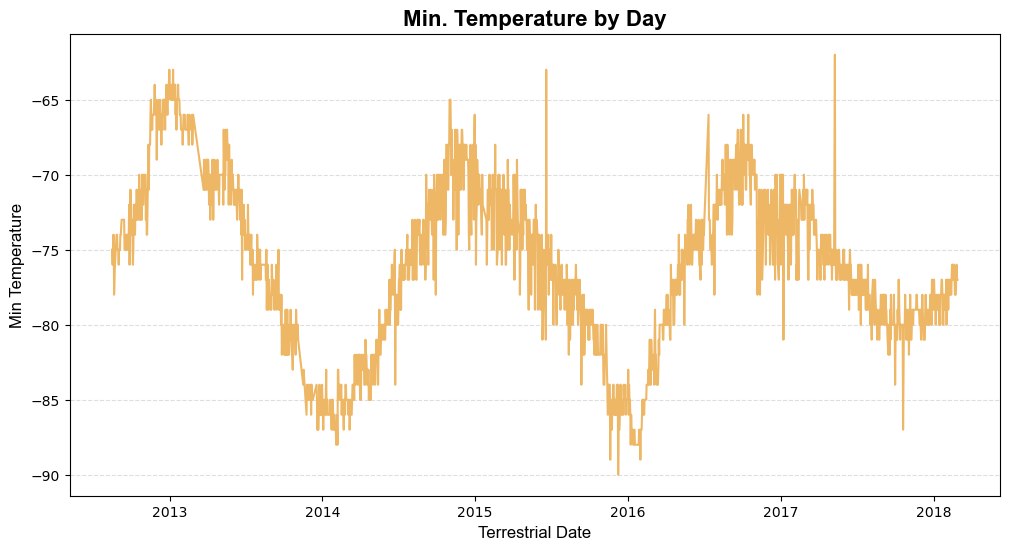

In [22]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.

# Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.plot(df.terrestrial_date, df.min_temp, color="#edb766")
plt.xlabel("Terrestrial Date", fontfamily="Arial", fontsize=12)
plt.ylabel("Min Temperature", fontfamily="Arial", fontsize=12)
plt.title("Min. Temperature by Day", fontweight="bold", fontsize=16, fontfamily="Arial")
plt.grid(axis="y", linestyle="--", color="lightgrey", alpha=0.75)

# Save the Graph
plt.show()

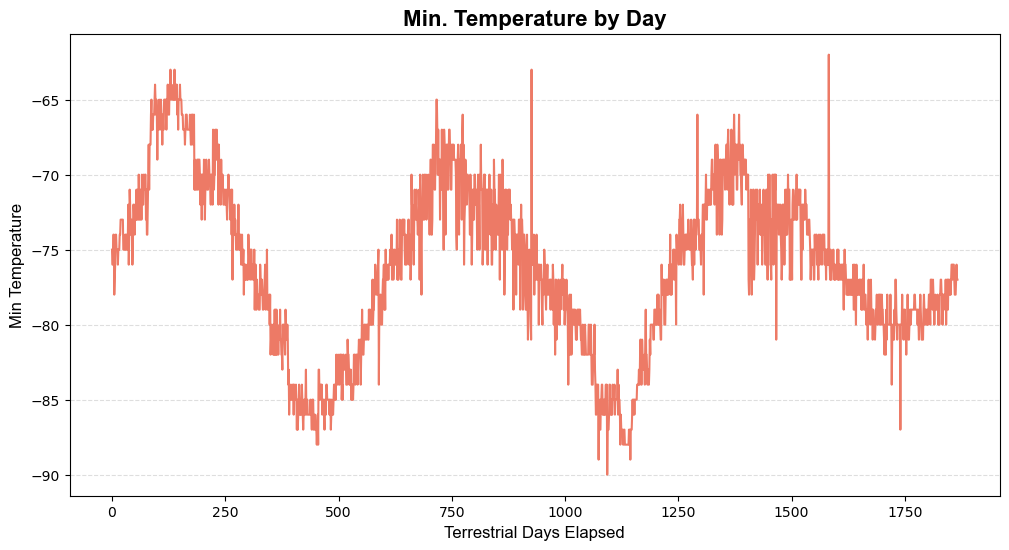

In [23]:
# Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.plot(df.index, df.min_temp, color="#ed7a66")
plt.xlabel("Terrestrial Days Elapsed", fontfamily="Arial", fontsize=12)
plt.ylabel("Min Temperature", fontfamily="Arial", fontsize=12)
plt.title("Min. Temperature by Day", fontweight="bold", fontsize=16, fontfamily="Arial")
plt.grid(axis="y", linestyle="--", color="lightgrey", alpha=0.75)

# Save the Graph
plt.show()

#### Minimum Temperature

From the data provided, I concluded that the coldest months were April and March, and the hottest months were August and September.

#### Atmospheric Pressure

By looking at the information above the highest atmospheric pressure were in the months of September and in February. The months with the lowest atmospheric pressure was June and May.

#### Year Length

The hottest year I conculed was in 2015, and the hottest was 2016. I did notice that if the year before it was hot the following year would be colder given the wave like pattern.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [24]:
# Write the data to a CSV
df.to_csv("mars_data_Ivy.csv", index=False)

In [25]:
browser.quit()